# 🚌 Predicción del tiempo de viaje urbano con regresión lineal

## 📚 Librerías

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## ▶️ **Carga de datos**

In [ ]:
file_name = 'transport.csv'
base_path = os.getcwd()
file_path = os.path.join(base_path, file_name)

df = pd.read_csv(file_path)

## 🔎 **Análisis Exploratorio de Datos**

In [ ]:
# Estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_distance_km   5000 non-null   float64
 1   pickup_hour        5000 non-null   int64  
 2   pickup_weekday     5000 non-null   int64  
 3   temperature_c      5000 non-null   float64
 4   rain_mm            5000 non-null   float64
 5   congestion_index   5000 non-null   float64
 6   trip_duration_min  5000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 273.6 KB


⭕ **Valores nulos**: no presenta valores nulos

In [ ]:
# Estadísticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance_km,5000.0,3.008343,2.910586,0.500000,0.838597,2.079493,4.136180,20.000000
pickup_hour,5000.0,11.478600,6.922827,0.000000,6.000000,11.000000,17.000000,23.000000
pickup_weekday,5000.0,3.048200,1.989339,0.000000,1.000000,3.000000,5.000000,6.000000
temperature_c,5000.0,18.017314,7.849517,-5.000000,12.743190,18.050720,23.245559,40.000000
rain_mm,5000.0,1.041449,1.036790,0.000048,0.310681,0.724297,1.427114,9.220159
congestion_index,5000.0,0.331610,0.210861,0.000000,0.167668,0.267166,0.525754,0.961135
trip_duration_min,5000.0,21.874801,13.898507,3.000000,12.421733,18.093535,27.292213,119.219485


In [ ]:
# Valores duplicados
df.duplicated().sum()

np.int64(0)

⭕ **Valores duplicados**: no presenta valores duplicados

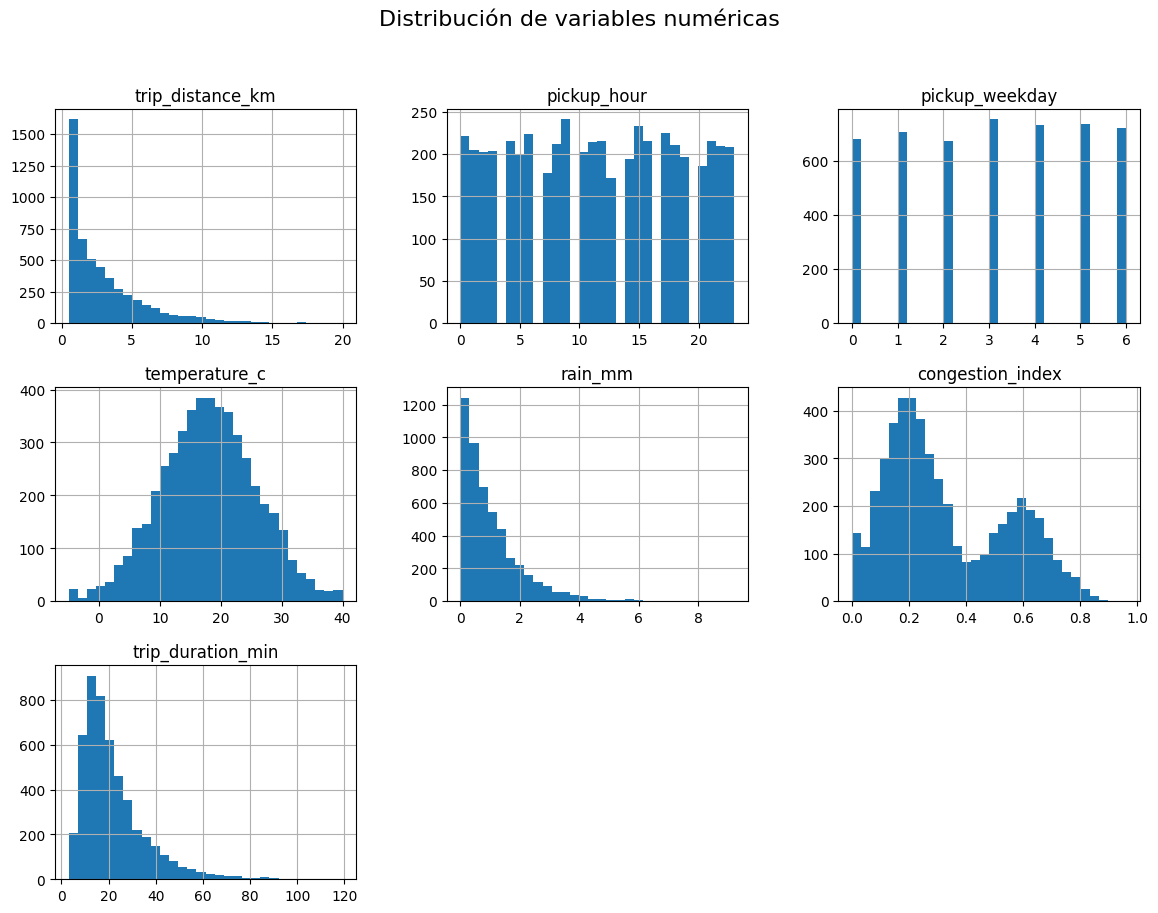

In [ ]:
# Visualización univariada
numeric_cols = df.columns

df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()


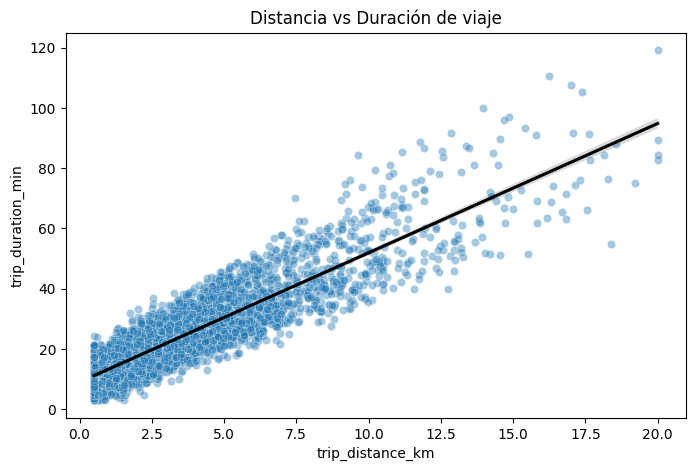

In [ ]:
# Relación entre distancia y la duración
plt.figure(figsize=(8,5))

sns.scatterplot(x="trip_distance_km", y="trip_duration_min", data=df, alpha=0.4)
sns.regplot(x="trip_distance_km", y="trip_duration_min", data=df, scatter=False, color="black")

plt.title("Distancia vs Duración de viaje")
plt.show()

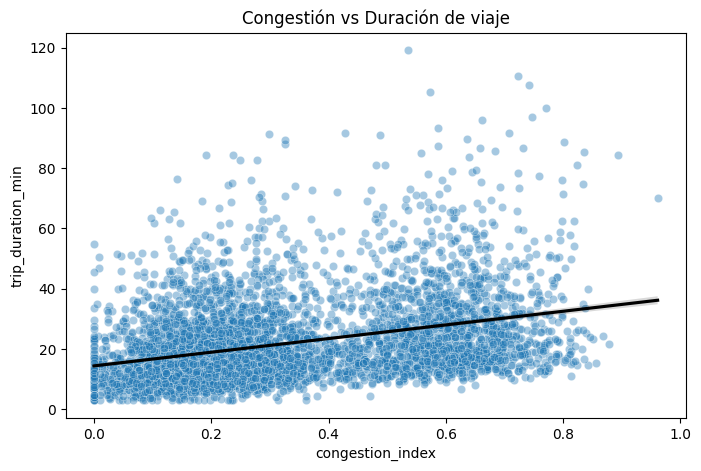

In [ ]:
# Relación entre congestión y la duración
plt.figure(figsize=(8,5))

sns.scatterplot(x="congestion_index", y="trip_duration_min", data=df, alpha=0.4)
sns.regplot(x="congestion_index", y="trip_duration_min", data=df, scatter=False, color="black")

plt.title("Congestión vs Duración de viaje")
plt.show()

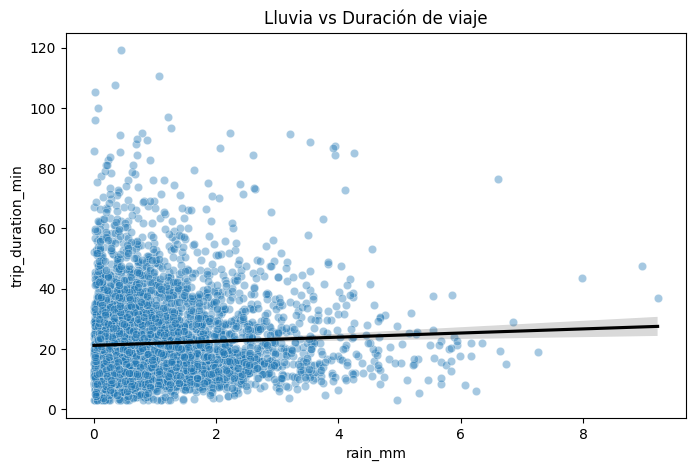

In [ ]:
# Relación entre lluvia y duración de viaje
plt.figure(figsize=(8,5))

sns.scatterplot(x="rain_mm", y="trip_duration_min", data=df, alpha=0.4)
sns.regplot(x="rain_mm", y="trip_duration_min", data=df, scatter=False, color="black")

plt.title("Lluvia vs Duración de viaje")
plt.show()

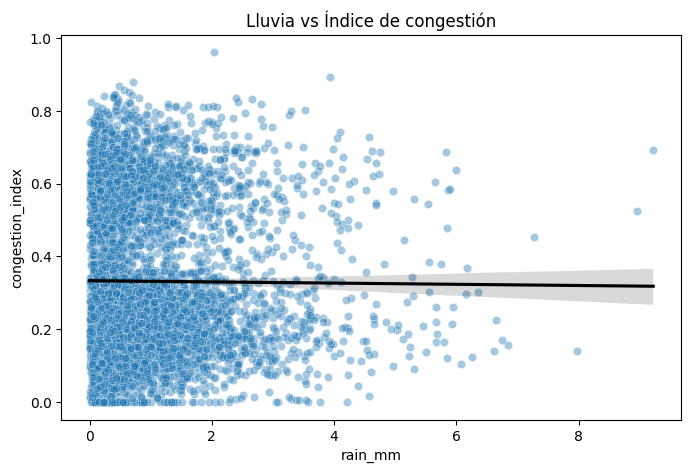

In [ ]:
# Relación entre lluvia e indice de congestión
plt.figure(figsize=(8,5))

sns.scatterplot(x="rain_mm", y="congestion_index", data=df, alpha=0.4)
sns.regplot(x="rain_mm", y="congestion_index", data=df, scatter=False, color="black")

plt.title("Lluvia vs Índice de congestión")
plt.show()

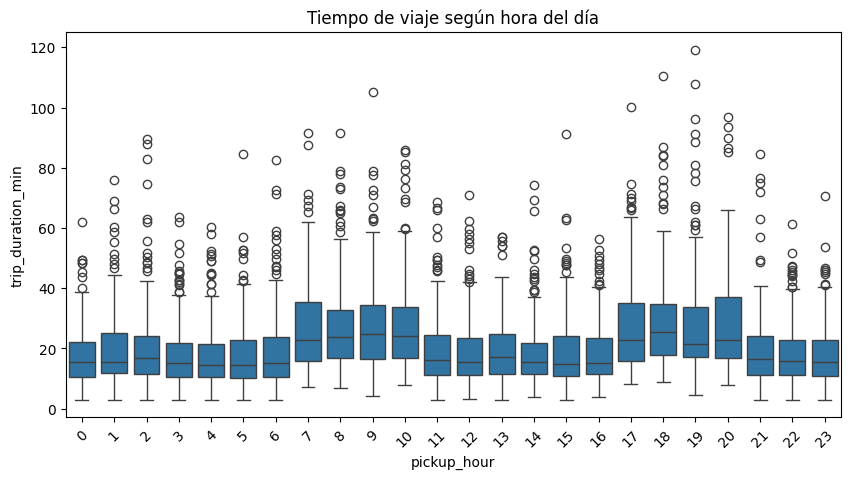

In [ ]:
# Relación entre la duración y la hora del día
plt.figure(figsize=(10,5))

sns.boxplot(x="pickup_hour", y="trip_duration_min", data=df)

plt.title("Tiempo de viaje según hora del día")
plt.xticks(rotation=45)
plt.show()

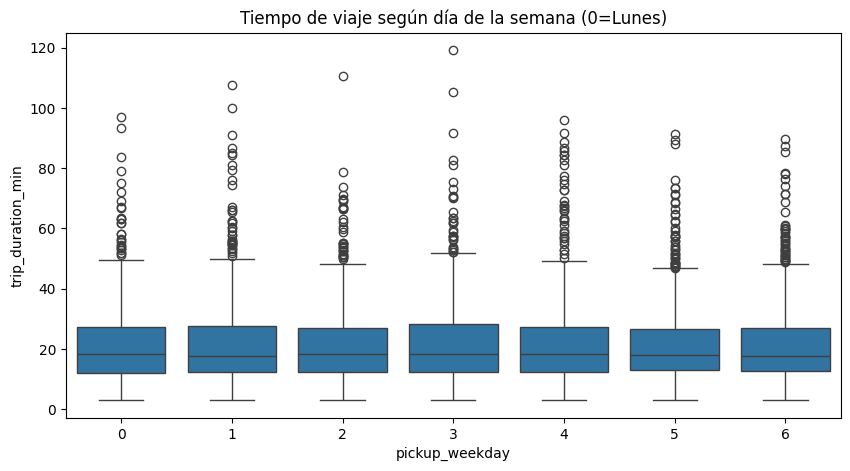

In [ ]:
# Relación del día de la semana con la duración
plt.figure(figsize=(10,5))

sns.boxplot(x="pickup_weekday", y="trip_duration_min", data=df)

plt.title("Tiempo de viaje según día de la semana (0=Lunes)")
plt.show()

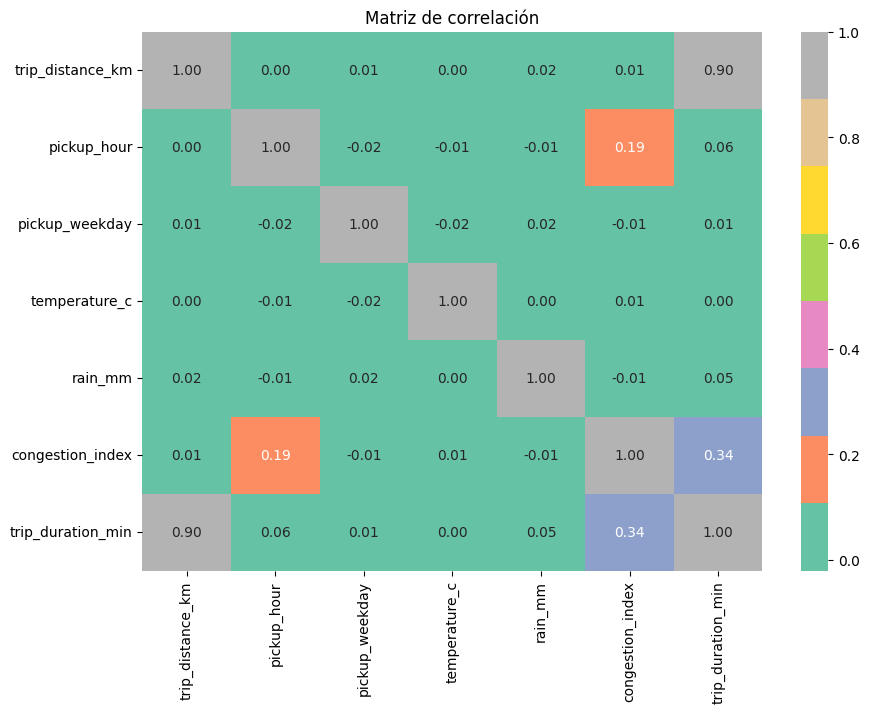

In [ ]:
# Matriz de correlación

plt.figure(figsize=(10,7))

sns.heatmap(df.corr(), annot=True, cmap="Set2", fmt=".2f")

plt.title("Matriz de correlación")
plt.show()

⏸️ **Conclusiones preliminares en base al EDA**:  
- La distancia está muy correlacionada con la duración de viaje.  
- El indice de congestión influye también un poco con la duración de viaje al menos hasta el momento.  
- Los viajes durante la media mañana y la tarde noche están más dispersos y duran más.  
- La lluia influye muy poco en la duración de viaje y en el índice de congestión.

## 📈 **Modelo predictivo con regresión lineal**

Primre intento del modelo predictivo, para saber como tratar a las variables antes de pasar al FE.

In [ ]:
# Variables predictoras y objetivo
X = df.drop(columns=["trip_duration_min"])
y = df["trip_duration_min"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicción
y_pred = model.predict(X_test)

In [ ]:
# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Métricas del modelo \n")
print(f"MAE:  {mae:.2f} minutos")
print(f"RMSE: {rmse:.2f} minutos")
print(f"R²:   {r2:.4f}")

Métricas del modelo 

MAE:  3.01 minutos
RMSE: 3.93 minutos
R²:   0.9179


In [ ]:
coef_table = pd.DataFrame({
    "feature": X.columns,
    "coef": model.coef_
}).sort_values("coef", ascending=False)

print("\n=== Coeficientes del Modelo ===")
print(coef_table)


=== Coeficientes del Modelo ===
            feature       coef
5  congestion_index  22.112713
0  trip_distance_km   4.288093
4           rain_mm   0.507716
1       pickup_hour   0.001142
3     temperature_c  -0.000218
2    pickup_weekday  -0.015880


⏸️ **Interpretación**  
El índice de congestión y la distancia de viaje son las features que más peso tienen en la predicción.  
Si la congestión aumenta un 0.1 (10%) se agregan 2.2 minutos.  
Por cada km extra se agregan 4.3 minutos extras.  
Cada mm de lluvia agrega medio minuto.  
Las demás variables no aportan nada al modelo.